In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d googleai/dataset-search-metadata-for-datasets

100% 2.51G/2.52G [00:42<00:00, 85.7MB/s]
100% 2.52G/2.52G [00:42<00:00, 63.8MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  dataset-search-metadata-for-datasets.zip
  inflating: dataset_metadata_2020_08_17.csv/dataset_metadata_2020_08_17.csv  
  inflating: dataset_metadata_2020_10_16.csv  


In [ ]:
ls

dataset_metadata_2020_08_17.csv/  dataset_metadata_2020_10_16.csv  kaggle.json


In [ ]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import string
import gensim
import operator
import re

In [ ]:
df=pd.read_csv('dataset_metadata_2020_10_16.csv',nrows=10000)

In [ ]:
df

,url,name,alternateName,description,variablesMeasured,measurementTechnique,sameAs,doi,identifier,author,isAccessibleForFree,dateModified,distribution,spatialCoverage,provider,funder,temporalCoverage,Unnamed: 17
0,https://catoblepas.oerc.ox.ac.uk/biodbcore-000...,FAIRsharing record for: CiteAb,CiteAb,This FAIRsharing record describes: CiteAb is t...,NaN,NaN,NaN,10.25504/FAIRsharing.d404th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.ccdc.cam.ac.uk/structures/search?s...,CCDC 691170: Experimental Crystal Structure De...,NaN,An entry from the Cambridge Structural Databas...,NaN,NaN,NaN,10.1021/cg800639x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://dbarchive.biosciencedbc.jp/jp/glycopro...,N結合型糖鎖の修飾位置 (Tax9606),NaN,IGOT法により糖鎖修飾位置を同定したヒトのタンパク質のリスト。 文献: J Proteom...,NaN,NaN,NaN,10.18908/lsdba.nbdc00797-004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://dx.doi.org/10.17182/hepdata.38162,Table 16,NaN,PT RELATIVE TO JET AXIS.,NaN,NaN,NaN,10.17182/32971,NaN,NaN,NaN,NaN,"contentUrl: ""https://www.hepdata.net/record/da...",NaN,NaN,NaN,NaN,NaN
4,https://scicrunch.org/resources/Any/record/nlx...,InSatDb,"SCR_007739, (InSatDb, RRID:SCR_007739), InSatDb",Database of microsatellite characteristics of ...,NaN,NaN,NaN,NaN,RRID:SCR_007739),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,http://datadiscoverystudio.org/geoportal/rest/...,Tree-ring width of Picea abies (Karsten) from ...,NaN,Techical Information: Species PCAB; No of ring...,NaN,NaN,NaN,10.1594/PANGAEA.619310,NaN,"Hofmann, Jutta",NaN,2007.0,"contentUrl: ""http://dx.doi.org/10.1594/PANGAEA...","box: ""50.9339 11.8649 51.0039 11.9349"", point:...",NaN,NaN,NaN,NaN
9996,https://dona.pwr.edu.pl/szukaj/default.aspx?sy...,Optical emission spectrometric determination o...,Oznaczanie arsenu i antymonu metodą optycznej ...,Library of Wroclaw University of Science and T...,NaN,NaN,NaN,10.1016/j.sab.2007.04.007,NaN,"Pohl, Paweł.; Jimenez Zapata, Israel.; Bings, ...",NaN,2007.0,NaN,NaN,NaN,NaN,NaN,NaN
9997,http://datadiscoverystudio.org/geoportal/rest/...,Tree-ring width of Picea abies (Karsten) from ...,NaN,Techical Information: Species PCAB; No of ring...,NaN,NaN,NaN,10.1594/PANGAEA.583041,NaN,"Bleyer, Hans-Jürgen",NaN,2007.0,"contentUrl: ""http://dx.doi.org/10.1594/PANGAEA...","box: ""47.6846 9.04884 47.7106 9.07484"", point:...",NaN,NaN,NaN,NaN
9998,http://datadiscoverystudio.org/geoportal/rest/...,Tree-ring width of Picea abies (Karsten) from ...,NaN,Techical Information: Species PCAB; No of ring...,NaN,NaN,NaN,10.1594/PANGAEA.567724,NaN,"Hofmann, Jutta",NaN,2007.0,"contentUrl: ""http://dx.doi.org/10.1594/PANGAEA...","box: ""47.7872 10.15 47.8072 10.17"", point: ""10...",NaN,NaN,NaN,NaN


**Semantic Search Engine**

In [ ]:
df=df[['url','name','alternateName','description']]

In [ ]:
df

,url,name,alternateName,description
0,https://catoblepas.oerc.ox.ac.uk/biodbcore-000...,FAIRsharing record for: CiteAb,CiteAb,This FAIRsharing record describes: CiteAb is t...
1,https://www.ccdc.cam.ac.uk/structures/search?s...,CCDC 691170: Experimental Crystal Structure De...,NaN,An entry from the Cambridge Structural Databas...
2,https://dbarchive.biosciencedbc.jp/jp/glycopro...,N結合型糖鎖の修飾位置 (Tax9606),NaN,IGOT法により糖鎖修飾位置を同定したヒトのタンパク質のリスト。 文献: J Proteom...
3,http://dx.doi.org/10.17182/hepdata.38162,Table 16,NaN,PT RELATIVE TO JET AXIS.
4,https://scicrunch.org/resources/Any/record/nlx...,InSatDb,"SCR_007739, (InSatDb, RRID:SCR_007739), InSatDb",Database of microsatellite characteristics of ...
...,...,...,...,...
9995,http://datadiscoverystudio.org/geoportal/rest/...,Tree-ring width of Picea abies (Karsten) from ...,NaN,Techical Information: Species PCAB; No of ring...
9996,https://dona.pwr.edu.pl/szukaj/default.aspx?sy...,Optical emission spectrometric determination o...,Oznaczanie arsenu i antymonu metodą optycznej ...,Library of Wroclaw University of Science and T...
9997,http://datadiscoverystudio.org/geoportal/rest/...,Tree-ring width of Picea abies (Karsten) from ...,NaN,Techical Information: Species PCAB; No of ring...
9998,http://datadiscoverystudio.org/geoportal/rest/...,Tree-ring width of Picea abies (Karsten) from ...,NaN,Techical Information: Species PCAB; No of ring...


**Text Preprocessing**

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

#create list of punctuations and stopwords
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#function for data cleaning and processing
#This can be further enhanced by adding / removing reg-exps as desired.

def spacy_tokenizer(sentence):

    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits adnd words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)

    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)

    #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)

    #creating token object
    tokens = spacy_nlp(sentence)

    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]

    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]

    #return tokens
    return tokens

In [ ]:
print ('Cleaning and Tokenizing...')
df['description_tokenized'] = df['description'].map(lambda x: spacy_tokenizer(x))

df.head()

Cleaning and Tokenizing...


,url,name,alternateName,description,description_tokenized
0,https://catoblepas.oerc.ox.ac.uk/biodbcore-000...,FAIRsharing record for: CiteAb,CiteAb,This FAIRsharing record describes: CiteAb is t...,"[fairsharing, record, describe, citeab, large,..."
1,https://www.ccdc.cam.ac.uk/structures/search?s...,CCDC 691170: Experimental Crystal Structure De...,NaN,An entry from the Cambridge Structural Databas...,"[entry, cambridge, structural, database, world..."
2,https://dbarchive.biosciencedbc.jp/jp/glycopro...,N結合型糖鎖の修飾位置 (Tax9606),NaN,IGOT法により糖鎖修飾位置を同定したヒトのタンパク質のリスト。 文献: J Proteom...,"[igot法により糖鎖修飾位置を同定したヒトのタンパク質のリスト, proteome, re..."
3,http://dx.doi.org/10.17182/hepdata.38162,Table 16,NaN,PT RELATIVE TO JET AXIS.,"[relative, jet, axis]"
4,https://scicrunch.org/resources/Any/record/nlx...,InSatDb,"SCR_007739, (InSatDb, RRID:SCR_007739), InSatDb",Database of microsatellite characteristics of ...,"[database, microsatellite, characteristic, ful..."


In [ ]:
desc = df['description_tokenized']

In [ ]:
desc

0       [fairsharing, record, describe, citeab, large,...
1       [entry, cambridge, structural, database, world...
2       [igot法により糖鎖修飾位置を同定したヒトのタンパク質のリスト, proteome, re...
3                                   [relative, jet, axis]
4       [database, microsatellite, characteristic, ful...
                              ...                        
9995    [techical, information, species, pcab, ring, b...
9996    [library, wroclaw, university, science, techno...
9997    [techical, information, species, pcab, ring, b...
9998    [techical, information, species, pcab, ring, b...
9999    [techical, information, species, pcob, ring, b...
Name: description_tokenized, Length: 10000, dtype: object

**EDA**

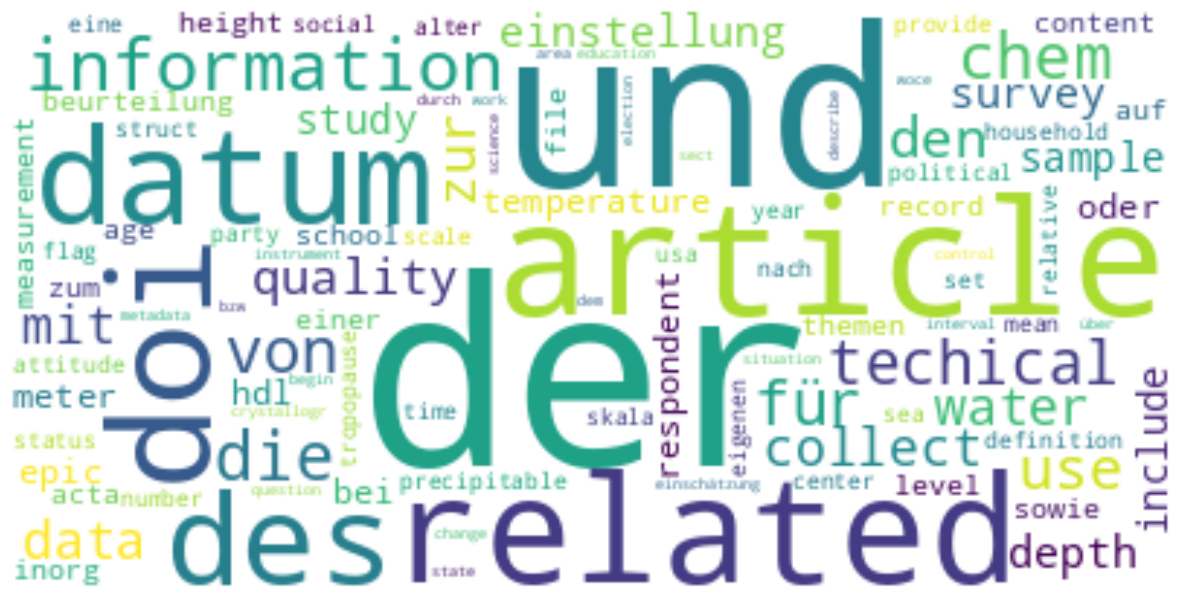

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(desc)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Verifying Zipf Law**

In [ ]:
from collections import Counter

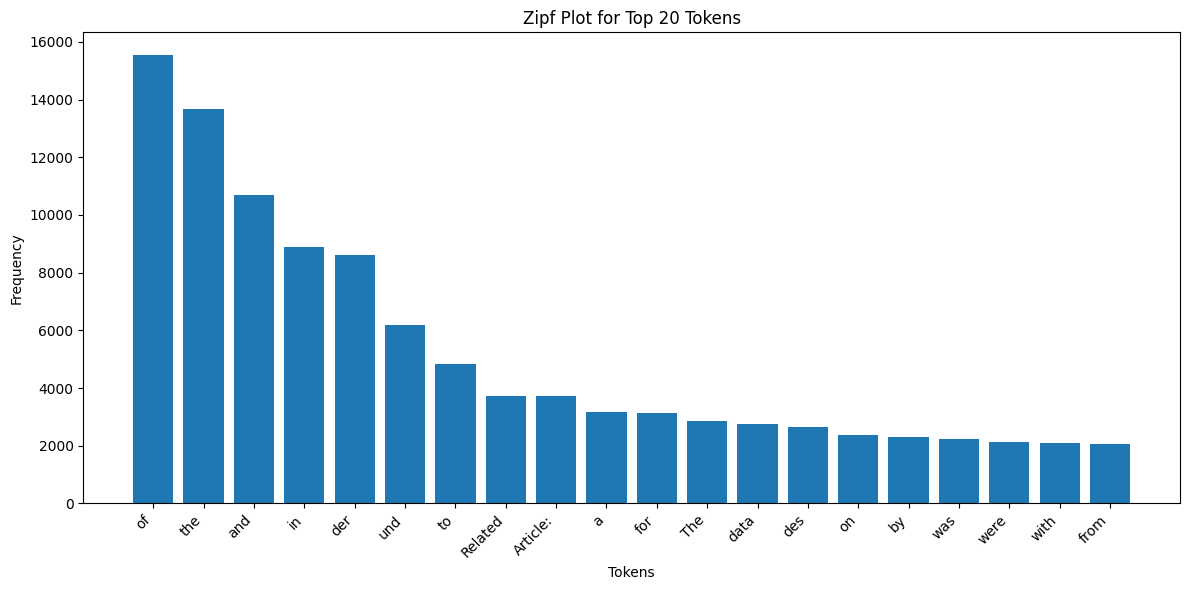

In [ ]:
all_tokens = " ".join(df["description"]).split()
token_counts = Counter(all_tokens)


sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

tokens, frequencies = zip(*sorted_tokens)

top_n = 20
top_tokens, top_frequencies = tokens[:top_n], frequencies[:top_n]


plt.figure(figsize=(12, 6))
plt.bar(range(len(top_tokens)), top_frequencies, tick_label=top_tokens)

plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.title("Zipf Plot for Top {} Tokens".format(top_n))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Verifying Heap's Law**

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess(data):
  data=data.lower()
  data=data.replace("\n"," ")
  data=re.sub("[^a-zA-Z ]+","",data)
  words = data.split()
  stop_words = set(stopwords.words('english'))
  words = [word for word in words if word not in stop_words]

  processed_data = " ".join(words)
  return processed_data

In [ ]:
from nltk.corpus import stopwords


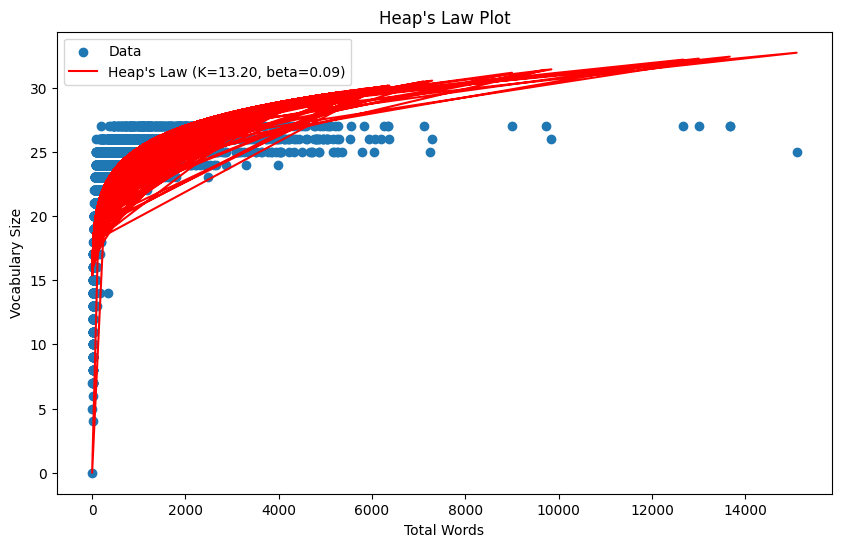

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


def heaps_law(T, K, beta):
    return K * (T**beta)

texts = df["description"]


vocab_sizes = []
total_words = []

for text in texts:

    tokenized_text = preprocess(text)
    vocab_size = len(set(tokenized_text))
    total_word_count = len(tokenized_text)

    vocab_sizes.append(vocab_size)
    total_words.append(total_word_count)

params, covariance = curve_fit(heaps_law, total_words, vocab_sizes)

K, beta = params

plt.figure(figsize=(10, 6))
plt.scatter(total_words, vocab_sizes, label='Data')
plt.plot(total_words, heaps_law(np.array(total_words), K, beta), 'r', label=f'Heap\'s Law (K={K:.2f}, beta={beta:.2f})')
plt.xlabel('Total Words')
plt.ylabel('Vocabulary Size')
plt.legend()
plt.title("Heap's Law Plot")
plt.show()

**Creating Vocabulary of Words**

In [ ]:
from gensim import corpora

#creating term dictionary
dictionary = corpora.Dictionary(desc)

#filter out terms which occurs in less than 4 documents and more than 20% of the documents.
#NOTE: Since we have smaller dataset, we will keep this commented for now.

#dictionary.filter_extremes(no_below=4, no_above=0.2)

#list of few which which can be further removed
stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)

In [ ]:
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['allow', 0], ['antibodie', 1], ['antibody', 2], ['application', 3], ['base', 4], ['citation', 5], ['citeab', 6], ['clonality', 7], ['clone', 8], ['describe', 9], ['engine', 10], ['fairsharing', 11], ['far', 12], ['filter', 13], ['find', 14], ['hone', 15], ['large', 16], ['method', 17], ['number', 18], ['powerful', 19], ['provide', 20], ['rank', 21], ['reactivity', 22], ['record', 23], ['search', 24], ['simple', 25], ['species', 26], ['transparent', 27], ['use', 28], ['user', 29], ['way', 30], ['work', 31], ['available', 32], ['cambridge', 33], ['ccdc', 34], ['cell', 35], ['condition', 36], ['contain', 37], ['coordinate', 38], ['crystal', 39], ['database', 40], ['dataset', 41], ['datum', 42], ['deposit', 43], ['diffraction', 44], ['entry', 45], ['experimental', 46], ['freely', 47], ['group', 48], ['include', 49], ['measure', 50]]]


**Feature Extraction**

In [ ]:
corpus = [dictionary.doc2bow(i) for i in desc]

word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)

[[('allow', 1), ('antibodie', 1), ('antibody', 2), ('application', 1), ('base', 1), ('citation', 2), ('citeab', 1), ('clonality', 1), ('clone', 1), ('describe', 1), ('engine', 1), ('fairsharing', 1), ('far', 1), ('filter', 1), ('find', 1), ('hone', 1), ('large', 1), ('method', 1), ('number', 1), ('powerful', 1), ('provide', 1), ('rank', 2), ('reactivity', 1), ('record', 1), ('search', 2), ('simple', 1), ('species', 1), ('transparent', 1), ('use', 1), ('user', 1), ('way', 1), ('work', 1)], [('available', 1), ('cambridge', 1), ('ccdc', 1), ('cell', 1), ('condition', 1), ('contain', 1), ('coordinate', 1), ('crystal', 2), ('database', 1), ('dataset', 1), ('datum', 1), ('deposit', 1), ('diffraction', 1), ('entry', 3), ('experimental', 2), ('freely', 1), ('group', 1), ('include', 1), ('measure', 1), ('molecule', 1), ('parameter', 1), ('quality', 1), ('repository', 1), ('small', 1), ('space', 1), ('structural', 1), ('structure', 1), ('study', 1), ('typically', 1), ('world', 1)], [('apr', 1), 

In [ ]:
%time desc_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
%time desc_lsi_model = gensim.models.LsiModel(desc_tfidf_model[corpus], id2word=dictionary, num_topics=300)

CPU times: user 291 ms, sys: 0 ns, total: 291 ms
Wall time: 302 ms
CPU times: user 18.1 s, sys: 1.49 s, total: 19.6 s
Wall time: 12.6 s


In [ ]:
%time gensim.corpora.MmCorpus.serialize('desc_tfidf_model_mm', desc_tfidf_model[corpus])
%time gensim.corpora.MmCorpus.serialize('desc_lsi_model_mm',desc_lsi_model[desc_tfidf_model[corpus]])

CPU times: user 1.11 s, sys: 29.9 ms, total: 1.14 s
Wall time: 1.21 s
CPU times: user 10.3 s, sys: 226 ms, total: 10.5 s
Wall time: 11.7 s


In [ ]:
desc_tfidf_corpus = gensim.corpora.MmCorpus('desc_tfidf_model_mm')
desc_lsi_corpus = gensim.corpora.MmCorpus('desc_lsi_model_mm')

print(desc_tfidf_corpus)
print(desc_lsi_corpus)

MmCorpus(10000 documents, 39741 features, 268270 non-zero entries)
MmCorpus(10000 documents, 300 features, 2999998 non-zero entries)


In [ ]:
from gensim.similarities import MatrixSimilarity

%time desc_index = MatrixSimilarity(desc_lsi_corpus, num_features = desc_lsi_corpus.num_terms)

CPU times: user 3.91 s, sys: 76.2 ms, total: 3.99 s
Wall time: 4.82 s


In [ ]:
desc_index

**Semantic Search**

In [ ]:
df

,url,name,alternateName,description,description_tokenized
0,https://catoblepas.oerc.ox.ac.uk/biodbcore-000...,FAIRsharing record for: CiteAb,CiteAb,This FAIRsharing record describes: CiteAb is t...,"[fairsharing, record, describe, citeab, large,..."
1,https://www.ccdc.cam.ac.uk/structures/search?s...,CCDC 691170: Experimental Crystal Structure De...,NaN,An entry from the Cambridge Structural Databas...,"[entry, cambridge, structural, database, world..."
2,https://dbarchive.biosciencedbc.jp/jp/glycopro...,N結合型糖鎖の修飾位置 (Tax9606),NaN,IGOT法により糖鎖修飾位置を同定したヒトのタンパク質のリスト。 文献: J Proteom...,"[igot法により糖鎖修飾位置を同定したヒトのタンパク質のリスト, proteome, re..."
3,http://dx.doi.org/10.17182/hepdata.38162,Table 16,NaN,PT RELATIVE TO JET AXIS.,"[relative, jet, axis]"
4,https://scicrunch.org/resources/Any/record/nlx...,InSatDb,"SCR_007739, (InSatDb, RRID:SCR_007739), InSatDb",Database of microsatellite characteristics of ...,"[database, microsatellite, characteristic, ful..."
...,...,...,...,...,...
9995,http://datadiscoverystudio.org/geoportal/rest/...,Tree-ring width of Picea abies (Karsten) from ...,NaN,Techical Information: Species PCAB; No of ring...,"[techical, information, species, pcab, ring, b..."
9996,https://dona.pwr.edu.pl/szukaj/default.aspx?sy...,Optical emission spectrometric determination o...,Oznaczanie arsenu i antymonu metodą optycznej ...,Library of Wroclaw University of Science and T...,"[library, wroclaw, university, science, techno..."
9997,http://datadiscoverystudio.org/geoportal/rest/...,Tree-ring width of Picea abies (Karsten) from ...,NaN,Techical Information: Species PCAB; No of ring...,"[techical, information, species, pcab, ring, b..."
9998,http://datadiscoverystudio.org/geoportal/rest/...,Tree-ring width of Picea abies (Karsten) from ...,NaN,Techical Information: Species PCAB; No of ring...,"[techical, information, species, pcab, ring, b..."


In [ ]:
from operator import itemgetter

def search_similar_data(search_term):

    query_bow = dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = desc_tfidf_model[query_bow]
    query_lsi = desc_lsi_model[query_tfidf]

    desc_index.num_best = 5

    data_list =desc_index[query_lsi]

    data_list.sort(key=itemgetter(1), reverse=True)
    data_names = []

    for j, data in enumerate(data_list):

        data_names.append (
            {
                'Relevance': round((data[1] * 100),2),
                'DataSet URL': df['url'][data[0]],
                'DataSet Name': df['name'][data[0]],
                'Description':df['description'][data[0]]
            }

        )
        if j == (desc_index.num_best-1):
            break

    return pd.DataFrame(data_names, columns=['Relevance','DataSet URL','DataSet Name','Description'])


In [ ]:
search_similar_data('ship')

,Relevance,DataSet URL,DataSet Name,Description
0,74.25,http://www.marine-geo.org/tools/search/Files.p...,Processed ship-based Navigation Data acquired ...,This data set was acquired with a ship-based N...
1,72.15,http://www.marine-geo.org/tools/search/Files.p...,Processed ship-based Navigation Data acquired ...,This data set was acquired with a ship-based N...
2,71.00,http://www.marine-geo.org/tools/search/Files.p...,Processed ship-based Navigation Data acquired ...,This data set was acquired with a ship-based N...
3,70.98,http://www.marine-geo.org/tools/search/Files.p...,Processed ship-based Navigation Data acquired ...,This data set was acquired with a ship-based N...
4,70.34,http://www.marine-geo.org/tools/search/Files.p...,Processed ship-based Navigation Data acquired ...,This data set was acquired with a ship-based N...


In [ ]:
df.to_csv('dataset_meta.csv')